In [1]:
import numpy as np
import matplotlib.pyplot as plt
import graphviz

In [2]:
from sklearn.datasets import load_iris, load_boston
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# 결정트리

## 분류

In [3]:
iris = load_iris() 

### 전처리 없이 학습 

In [4]:
model = DecisionTreeClassifier()
cross_val_score(estimator=model, X=iris.data, y=iris.target, cv=5)

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

### 전처리 후 학습

In [5]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)
cross_val_score(estimator=model, X=iris.data, y=iris.target, cv=5)

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

### 시각화 

In [6]:
model = DecisionTreeClassifier()
model.fit(iris.data, iris.target) 

DecisionTreeClassifier()

In [7]:
# 요즘은 이런거 잘 안한단다 (과거유행 이거랑 밑에꺼 ㅋㅋ)
from sklearn import tree
r = tree.export_text(decision_tree=model, feature_names=iris.feature_names)
print(r)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

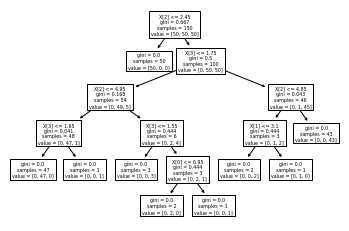

In [8]:
tree.plot_tree(model)

In [9]:
# 요즘은 이렇게
vis_data = tree.export_graphviz(decision_tree=model,
                                feature_names = iris.feature_names,
                                class_names=iris.target_names,
                                filled=True,
                                rounded=True,
                                special_characters=True)

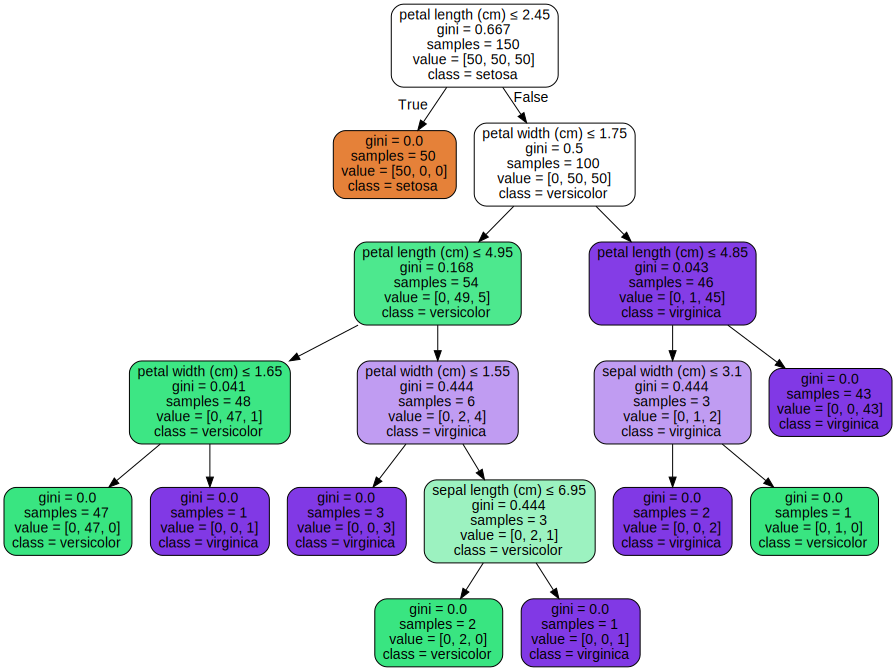

In [10]:
graph = graphviz.Source(vis_data)
graph

## 회귀

In [11]:
boston = load_boston() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

### 전처리 없이 

In [12]:
model = DecisionTreeRegressor()
cross_val_score(estimator=model, X=boston.data, y=boston.target, cv=5)

array([ 0.67730277,  0.62415571,  0.59179026,  0.39491   , -1.06777711])

### 전처리 후 학습 

In [13]:
model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)
cross_val_score(estimator=model, X=boston.data, y=boston.target, cv=5)

array([ 0.58600631,  0.41610461,  0.64962203,  0.36128956, -1.06448898])

### 시각화 

In [14]:
model = DecisionTreeRegressor()
model.fit(boston.data, boston.target) 

DecisionTreeRegressor()

In [15]:
# 요즘은 이렇게
vis_data = tree.export_graphviz(decision_tree=model,
                                feature_names = boston.feature_names,
                                # class_names=iris.target_names, 회귀니까 클래스 필요없다
                                filled=True,
                                rounded=True,
                                special_characters=True)

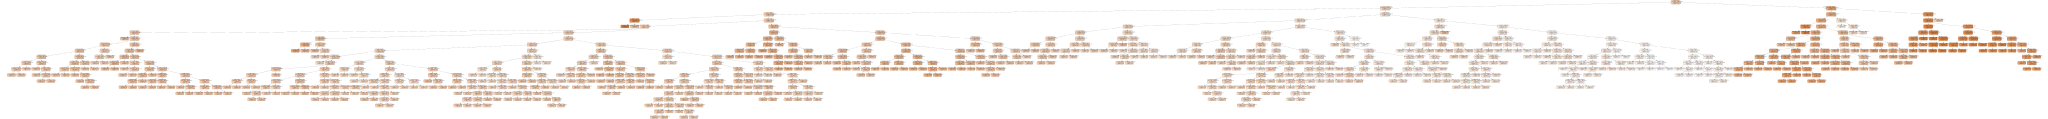

In [16]:
graph = graphviz.Source(vis_data)
graph

# 랜덤포레스트

In [17]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_validate

## 분류

### 전처리 없이 

In [18]:
model = RandomForestClassifier()
cross_validate(estimator=model, X=iris.data, y=iris.target, cv=5)

{'fit_time': array([0.27897143, 0.17127919, 0.15469599, 0.20016813, 0.16795158]),
 'score_time': array([0.01789618, 0.01334739, 0.01140141, 0.01035261, 0.01216888]),
 'test_score': array([0.96666667, 0.96666667, 0.9       , 0.93333333, 1.        ])}

### 전처리 후 

In [19]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)
cross_validate(estimator=model, X=iris.data, y=iris.target, cv=5)

{'fit_time': array([0.14412379, 0.1355176 , 0.13652277, 0.15974402, 0.1408031 ]),
 'score_time': array([0.01076484, 0.0118711 , 0.0117569 , 0.01147437, 0.01041317]),
 'test_score': array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])}

## 회귀 

### 전처리 x 

In [20]:
model = RandomForestRegressor()
cross_validate(estimator=model, X=boston.data, y=boston.target, cv=5)

{'fit_time': array([0.34442091, 0.3349731 , 0.35387492, 0.32075214, 0.32642126]),
 'score_time': array([0.01073837, 0.01046062, 0.01232409, 0.01037216, 0.01084518]),
 'test_score': array([0.77046428, 0.86201085, 0.74245757, 0.4761939 , 0.23294439])}

### 전처리 o 

In [21]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor)

cross_validate(estimator=model, X=boston.data, y=boston.target, cv=5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
TypeError: fit() missing 1 required positional argument: 'y'

  warnings.warn(some_fits_failed_message, FitFailedWarning)


{'fit_time': array([0.00284791, 0.00121403, 0.00097585, 0.00093818, 0.00086641]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_score': array([nan, nan, nan, nan, nan])}